# Задача 2

In [3]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

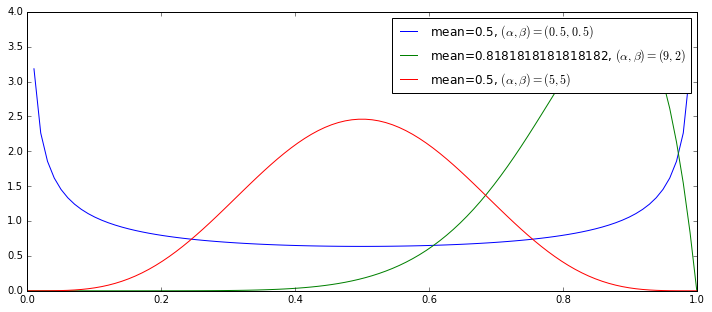

In [55]:
# Массив параметров бета распределения - априорного для Бернулли
my_pr = [(0.5,0.5), (9,2), (5,5)]

plt.figure(figsize=(12,5))
# Набор значений от 0 до 1
x = linspace(0,1,100)
# Строю графики для трёх параметров
for pp in my_pr:
    plt.plot(x, beta.pdf(x,a=pp[0],b=pp[1]), \
             label='mean={}, $(\\alpha,\\beta)=({},{})$'.format(pp[0]/(pp[0]+pp[1]), pp[0], pp[1]))
plt.legend()
plt.show()

Параметры априорного распределения:

(0.5,0.5) - монета нечестная (наименее вероятны значения 𝑝 в окрестности 0.5)

(7,2) - монета, скорее всего, нечестная, перевес в сторону герба (наиболее вероятны значения 𝑝 в окрестности 1)

(5,5) - монета, скорее, честна (наиболее вероятны значения 𝑝 в окрестности 0.5)

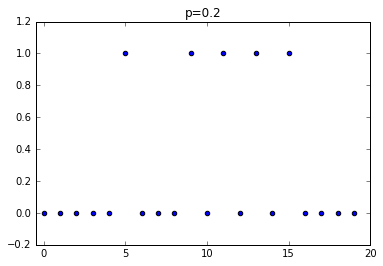

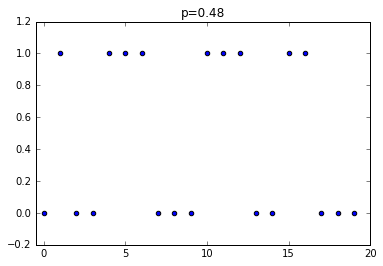

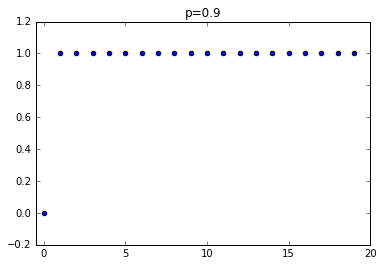

In [56]:
# Набор различных p - параметров бернуллиевского распределения
my_p = [0.2, 0.48, 0.9]
assert len(my_p) == len(my_pr), "Длины не совпадают"

# Количество бросков монет
num = 20
x = np.zeros((len(my_p), num))

# Записываю в X исходы 20 подбрасываний монет
# для каждого из параметров p
for i in range(len(my_p)):
    x[i] = binom.rvs(n=1, p=my_p[i], size=num)

# Строю графики для демонстрации подбрасывания монет
# для разных p
for i, it in zip(x, arange(len(x))):
    figure()
    scatter(arange(num), i)
    xlim((-0.5,num))
    title('p={}'.format(my_p[it]))
    show()

Математическое ожидания у распределения $\\Beta(\alpha,\beta)$: mean=$\frac{\alpha}{\alpha + \beta}.$ 

$\alpha=\alpha_0 + \sum_{i=1}^n x_i$, $\beta=\beta_0 + n - \sum_{i=1}^n x_i$. 

Следовательно, байесовская оценка параметра $p$: ${\theta^*=\frac{\alpha_0 + \sum_{i=1}^n x_i}{\alpha_0 + \beta_0 + n}}.$

In [57]:
"""
est - массив байесовских оценок для каждого параметра априорного
распределения и для каждого параметра p

mle - массив ОМП для каждого параметра p
"""
est = np.zeros((len(my_p),len(my_p),num))
mle = np.zeros((len(my_p),num))

for i in range(len(my_p)):
    # Записываю байесовские оценки
    for k in range(len(my_p)):
        est[i][k] = [(my_pr[k][0] + sum(x[i][:(j+1)]))/(my_pr[k][0] + my_pr[k][1] + j+1)\
                  for j in range(1, num+1)]
    # Записываю ОМП, то есть выборочное среднее
    mle[i] = [mean(x[i][:(j+1)]) for j in range(1, num+1)]

Строю графики:

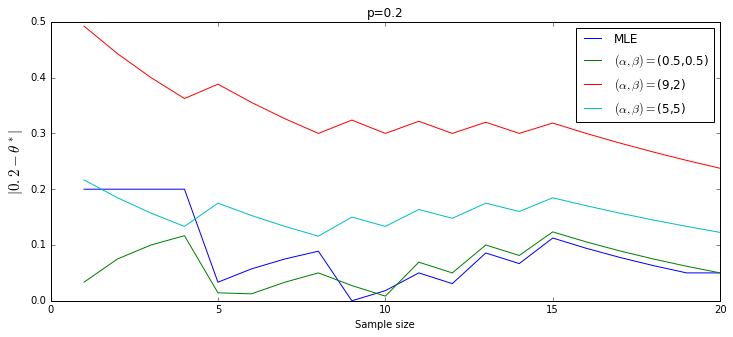

In [58]:
i = 0

figure(figsize=(12,5))
# Модуль разности ОМП и истинного значения параметра p
plot(np.arange(1,num+1),abs(my_p[i]-mle[i]), label='MLE')
for j in range(len(my_p)):
    xlabel('Sample size')
    ylabel('$|{} - \\theta^*|$'.format(my_p[i]), fontsize=15)
    title('p={}'.format(my_p[i]))
    # Модуль разности байесовской оценки и истинного значения параметра p
    plot(np.arange(1,num+1),abs(my_p[i]-est[i][j]),\
         label='$(\\alpha,\\beta)=$({},{})'.format(my_pr[j][0], my_pr[j][1]))
legend()
show()

Монета нечестная: лучше всего параметр $p$ оценен ОМП и априорным распределением с параметром (0.5,0.5) (монета нечестная).

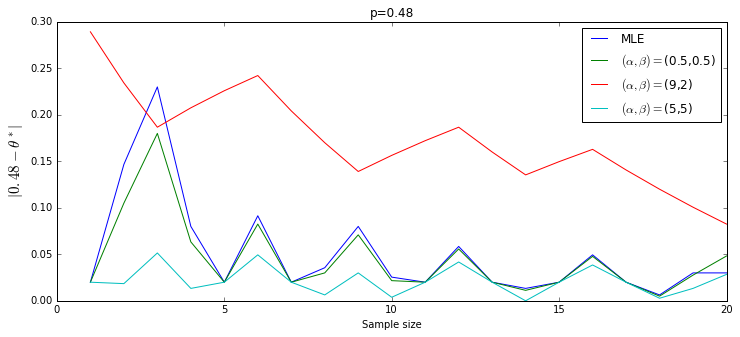

In [59]:
i = 1

figure(figsize=(12,5))
# Модуль разности ОМП и истинного значения параметра p
plot(np.arange(1,num+1),abs(my_p[i]-mle[i]), label='MLE')
for j in range(len(my_p)):
    xlabel('Sample size')
    ylabel('$|{} - \\theta^*|$'.format(my_p[i]), fontsize=15)
    title('p={}'.format(my_p[i]))
    # Модуль разности байесовской оценки и истинного значения параметра p
    plot(np.arange(1,num+1),abs(my_p[i]-est[i][j]),\
         label='$(\\alpha,\\beta)=$({},{})'.format(my_pr[j][0], my_pr[j][1]))
legend()
show()

Монета скорее честная: лучше всего показали себя ОМП вместе с параметрами априорного распределения (0.5,0.5) (монета нечестная) и (5,5) (монета, скорее, честна).

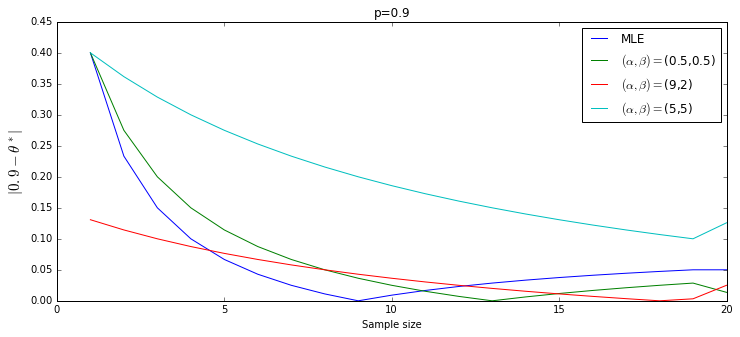

In [60]:
i = 2

figure(figsize=(12,5))
# Модуль разности ОМП и истинного значения параметра p
plot(np.arange(1,num+1),abs(my_p[i]-mle[i]), label='MLE')
for j in range(len(my_p)):
    xlabel('Sample size')
    ylabel('$|{} - \\theta^*|$'.format(my_p[i]), fontsize=15)
    title('p={}'.format(my_p[i]))
    # Модуль разности байесовской оценки и истинного значения параметра p
    plot(np.arange(1,num+1),abs(my_p[i]-est[i][j]),\
         label='$(\\alpha,\\beta)=$({},{})'.format(my_pr[j][0], my_pr[j][1]))
legend()
show()

Монета, скорее всего, нечестная, перевес в сторону герба: лучшей оценкой оказалось математическое ожидание априорного распределения с параметрами (0.5,0.5) (монета нечестная) и (9,2) (монета, скорее всего, нечестная, перевес в сторону герба).

В целом, удалось правильно оценить параметр $p$ и сделать верные выводы о честности монеты.